In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Nugent Score

## GG97 OTU

In [2]:
task = 'Ravel Nugent Low/High GG97 OTU'
folder = 'ravel-nugent'

In [3]:
num_features = 1095
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/KDUFK5_ravel_20210215_09_06_47/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/2Z77F0_ravel_20210215_09_07_09/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/HCILIX_ravel_20210215_10_07_02/best_test.csv', sep=';') # NoRel+CLR

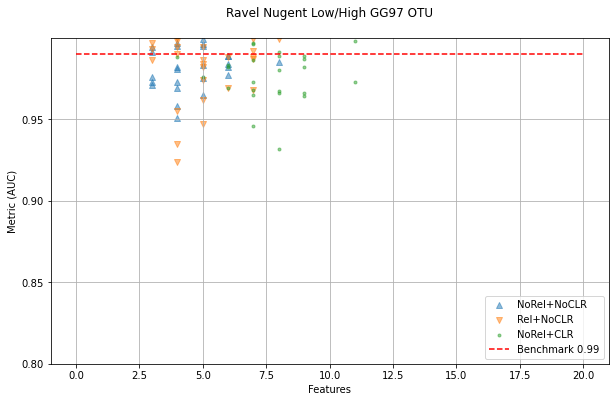

In [6]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.99, filename='./plots/ravel_nugent_gg97_otu.png', xmax=20, ylim=(0.8, 1))

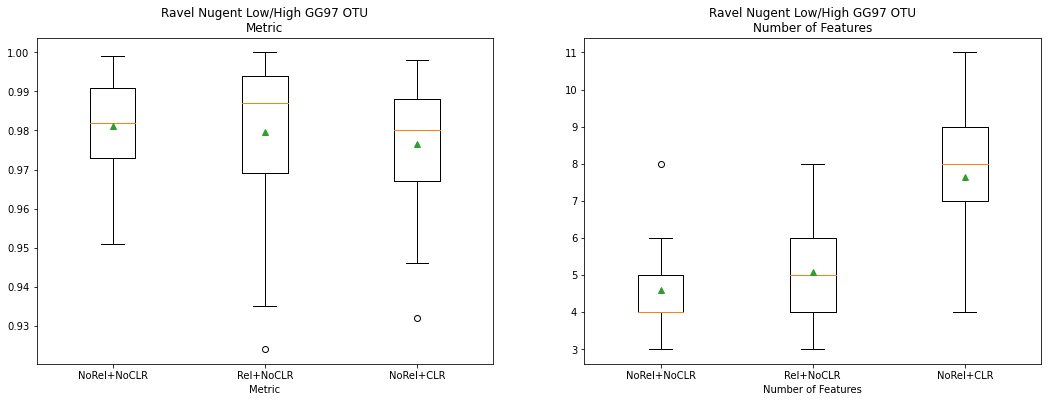

In [7]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plots/ravel_nugent_boxplot_gg97_otu.png')

In [8]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [9]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [10]:
n = 100

In [11]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 1095)


In [14]:
# Experiment 2

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 1095)


In [15]:
# Experiment 3

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 1095)


In [16]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
5,2,5,0.999,0.994,"[3, 115, 136, 473, 791]",0.994,0.994,"[0.992, 0.976, 0.978, 0.98, 0.976, 0.998, 0.97...",0.984,0.904,1.0,0.015
3,1,4,0.969,0.965,"[3, 136, 791, 1060]",0.965,0.965,"[0.991, 0.976, 0.975, 0.96, 0.996, 0.98, 0.975...",0.984,0.933,1.0,0.013
60,24,6,0.984,0.979,"[15, 115, 136, 473, 791, 1060]",0.979,0.979,"[0.989, 0.979, 0.977, 0.969, 0.982, 1.0, 0.989...",0.983,0.919,1.0,0.013
29,14,6,0.989,0.984,"[72, 136, 141, 473, 791, 1060]",0.984,0.984,"[0.953, 0.992, 0.988, 0.987, 0.992, 0.96, 0.99...",0.983,0.912,1.0,0.014
49,20,3,0.991,0.988,"[7, 115, 136]",0.988,0.988,"[0.98, 0.981, 0.991, 0.955, 0.968, 0.999, 0.96...",0.982,0.946,1.0,0.014


In [17]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
18,5,6,0.988,0.983,"[96, 136, 141, 473, 612, 898]",0.983,0.983,"[0.999, 0.975, 0.983, 0.992, 0.963, 0.997, 0.9...",0.981,0.924,1.0,0.017
0,0,5,0.986,0.981,"[3, 115, 133, 136, 791]",0.981,0.981,"[0.995, 0.976, 0.954, 0.969, 0.97, 0.997, 0.99...",0.979,0.924,1.0,0.017
37,15,3,0.986,0.983,"[3, 136, 791]",0.983,0.983,"[0.983, 0.968, 0.994, 0.963, 0.975, 0.92, 0.97...",0.979,0.908,1.0,0.018
44,21,5,0.994,0.989,"[3, 42, 136, 159, 769]",0.989,0.989,"[0.983, 0.973, 0.994, 0.992, 0.998, 0.979, 0.9...",0.978,0.844,1.0,0.022
21,7,5,0.984,0.979,"[0, 7, 127, 136, 159]",0.979,0.979,"[0.984, 0.982, 0.94, 0.976, 0.982, 0.975, 0.96...",0.978,0.891,1.0,0.019


In [18]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
20,16,7,0.996,0.990,"[3, 94, 136, 141, 592, 791, 918]",0.990,0.990,"[0.996, 0.979, 0.989, 0.977, 0.981, 1.0, 0.995...",0.983,0.918,1.0,0.016
8,7,9,0.989,0.981,"[35, 98, 127, 136, 141, 367, 606, 791, 1009]",0.981,0.981,"[0.998, 0.984, 0.975, 0.974, 0.988, 0.996, 0.9...",0.983,0.948,1.0,0.012
16,13,11,0.998,0.988,"[7, 94, 115, 136, 278, 572, 767, 769, 781, 789...",0.988,0.988,"[0.975, 0.98, 0.97, 0.976, 0.992, 0.97, 0.973,...",0.982,0.939,1.0,0.013
1,1,5,0.976,0.971,"[7, 127, 136, 791, 978]",0.971,0.971,"[0.987, 0.999, 0.988, 0.975, 1.0, 0.961, 0.982...",0.982,0.925,1.0,0.017
31,24,7,0.973,0.967,"[3, 5, 87, 136, 200, 791, 993]",0.967,0.967,"[0.983, 0.995, 1.0, 0.988, 0.976, 0.965, 0.985...",0.981,0.927,1.0,0.014


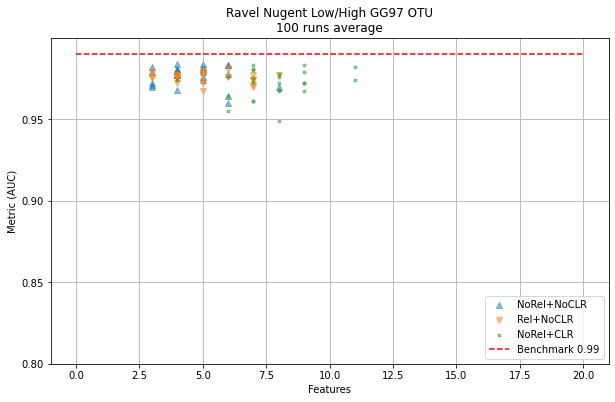

In [19]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.99, filename='./plots/ravel_nugent_gg97_otu_avg_n.png', xmax=20, ylim=(0.8, 1))

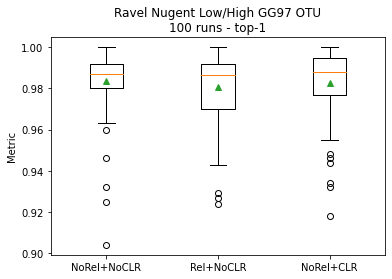

In [20]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plots/ravel_nugent_boxplot_nruns_top1_gg97_otu.png')

---

In [3]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [4]:
folder = 'ravel-nugent'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [5]:
config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (342, 1095)
Final dataset shape: (342, 1095)
Final dataset shape: (342, 1095)


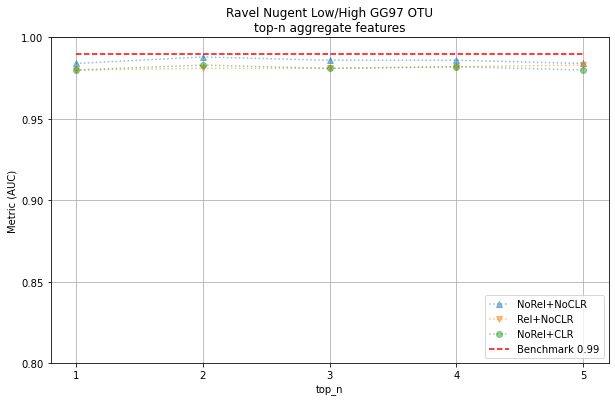

In [6]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.99, filename='./plots/ravel_nugent_nruns_topn_gg97_otu.png', xmax=(top_n-1), ylim=(0.8, 1.0001), top_n=top_n)

In [7]:
best_n

{'NoRel+NoCLR': [0.984, 0.988, 0.986, 0.986, 0.984],
 'Rel+NoCLR': [0.98, 0.981, 0.981, 0.982, 0.983],
 'NoRel+CLR': [0.98, 0.983, 0.981, 0.982, 0.98]}

---

In [8]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [17]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
       4377809      0.0087    []
        495451      0.0371    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__']
       1105876      0.1032    []
        114964      0.1594    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__vaginalis']
        986513      0.2761    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Clostridium; s__']
        137183      0.4156    []



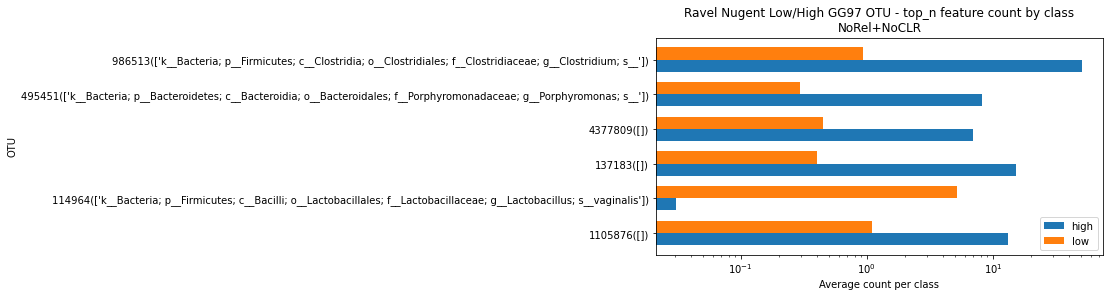

In [18]:
features = data1.features[top_n_features]
filename = f'./plots/ravel_nugent_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename)

In [19]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        403822      0.013     ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__']
       4377809      0.0155    []
        463361      0.0198    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
        654307      0.0245    []
        133372      0.0363    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__; s__']
        495451      0.0387    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__']
        175062      0.0409    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Clostridiaceae; g__Anaerococcus; s__hydrogenalis']
       1028283      0.0503    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__']
        225846      0.0548    ['k__Bacteria; p__Firmicutes; c__C

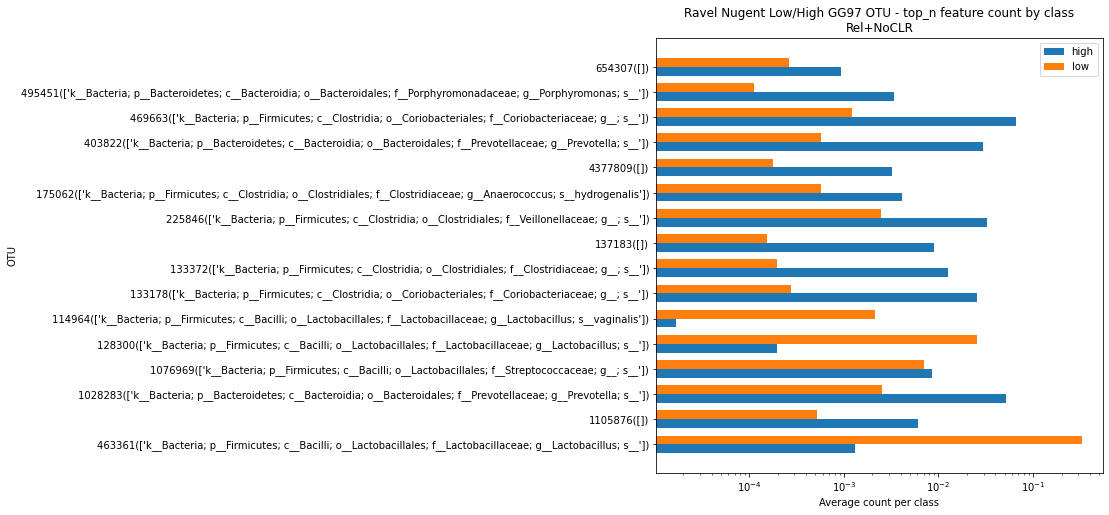

In [20]:
features = data2.features[top_n_features]
filename = f'./plots/ravel_nugent_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,8), filename=filename)

In [27]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        741701      0.0156    []
        495451      0.0235    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__']
        134467      0.0262    ['k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Lactobacillaceae; g__Lactobacillus; s__']
       1105876      0.0319    []
        225846      0.0355    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Veillonellaceae; g__; s__']
        386273      0.1035    ['k__Bacteria; p__Proteobacteria; c__Epsilonproteobacteria; o__Campylobacterales; f__Campylobacteraceae; g__Campylobacter; s__ureolyticus']
        137183      0.1873    []
        133178      0.5765    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Coriobacteriales; f__Coriobacteriaceae; g__; s__']



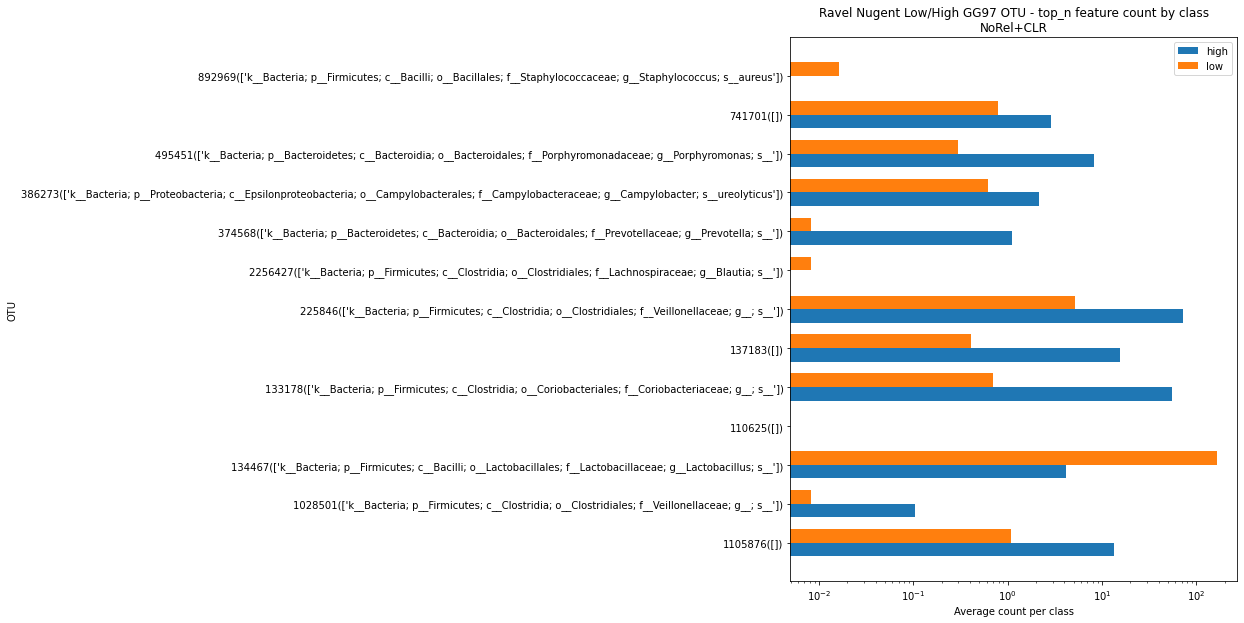

In [28]:
features = data3.features[top_n_features]
filename = f'./plots/ravel_nugent_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,10), filename=filename)